In [2]:
import os
from hanspell import spell_checker
import kss
import pandas as pd
import itertools
import os
from typing import Final, List
from pathlib import Path
from preprocessing import preprocess
from tqdm.notebook import tqdm_notebook as tqdm
from nltk import word_tokenize, pos_tag, ne_chunk

from load import DataLoad
from text_preprocess import Preprocess

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [9]:
dl = DataLoad(tran_path='./transcripts.csv', meta_path='./videos.csv')
transcripts = dl.load_transcripts()
meta = dl.load_meta()

In [10]:
transcripts

,text,start,duration,video_id
0,분해하는 걸 인수분해라 그래요,8.220,3.360,Fgm5umQsHxM
1,분해해요,10.200,2.580,Fgm5umQsHxM
2,뭘로,11.580,2.820,Fgm5umQsHxM
3,인수로 분해한다 그래서 인수분해 그럼,12.780,2.819,Fgm5umQsHxM
4,무슨 뜻을 알아야 돼요,14.400,3.060,Fgm5umQsHxM
...,...,...,...,...
22126,다 이렇게 해서 문제를 한번,745.680,3.320,aQ_Hy_hItS8
22127,풀어보도록 한번 해보자,749.399,3.301,aQ_Hy_hItS8
22128,근의 공식은 기본적으로 일단 외워줘야,751.019,3.661,aQ_Hy_hItS8
22129,돼 그냥 공식은 일단,752.700,4.340,aQ_Hy_hItS8


In [11]:
pop_id = meta[:30]['id'].to_list()
pop_id.remove('ktWNA_zrB8s')
unpop_id = meta[-30:]['id'].to_list()
unpop_id.remove('4hFRaWh4pAY')

In [12]:
pop_id

['yjSgBIT6dbk',
 'UKD3ZmGLPt4',
 'LAQI9Kjiwkc',
 'DDZ8vvoQC7g',
 'C6OrR8wpxk0',
 'sEgcGnoufh0',
 'lKxX0WCQ8gE',
 'p53fHJ_cmb4',
 'VOVtsFrMzYk',
 'qSJqALuM6w4',
 'mMpM48Es-sg',
 'e0sQtRZX7KQ',
 '3ywAbuz0cMI',
 'Aj7sBCuMKaQ',
 'S1DO792UPiQ',
 'JmKNoFeZP4Y',
 'KzXwe7DNp1o',
 'Sk6daIKDh-E',
 'eT2gs_L8jxA',
 'Ao3QUFMTSyk',
 'Ca0lFg2MGSc',
 'GkbGo1Y-4oI',
 'NF64LXVu1xo',
 '4BjR0bqDL3E',
 'DKvgS1v3O7M',
 '3LQYGZjOUoA',
 'CSmYRGM-900',
 'MOfaIwK9I4A',
 '2YiZrIJzUsk']

In [13]:
transcripts[transcripts['video_id'].isin(pop_id)]

,text,start,duration,video_id
323,자 우리 오늘은요 대망의 인수분해 에 대해서 배워보도록 할겁니다 어이,0.000,11.969,LAQI9Kjiwkc
324,제법 인수 분해 까지 왔어 그러니까 인순의 정도 배웠다 싶으면 이제 어데,5.580,10.740,LAQI9Kjiwkc
325,같이 중 3이 중 서민 것보다 이렇게 뭔가 느낌이 팍,11.969,10.411,LAQI9Kjiwkc
326,이제 오지 아니 얘들아 이인수 문의 부터는 요 진짜 앞에서 우리가 배웠던,16.320,9.270,LAQI9Kjiwkc
327,제곱근 곱셈 공식 이런 것도 너무 중요한데,22.380,9.120,LAQI9Kjiwkc
...,...,...,...,...
18703,이창 두고 얘는 이차방정식 이야,4479.850,6.720,DKvgS1v3O7M
18704,그 이거를 어 함수로 도 풀어 낼 거다 디어 다시 이런 내용들이 반복하,4482.970,4.680,DKvgS1v3O7M
18705,거다 라고 조금,4486.570,4.620,DKvgS1v3O7M
18706,기억을 비리 좀 해 두고 머리에 가기를 시켰어요 좋겠습니다,4487.650,9.740,DKvgS1v3O7M


In [14]:
transcripts['pop'] = transcripts['video_id'].apply(lambda x : 1 if x in pop_id else 0)
transcripts['unpop'] = transcripts['video_id'].apply(lambda x : 1 if x in unpop_id else 0)

In [15]:
pop_df = transcripts[transcripts['pop'] == 1]
unpop_df = transcripts[transcripts['unpop'] == 1]

In [32]:
pop_dict = pop_df.groupby('video_id').sum().to_dict()['text']
unpop_dict = unpop_df.groupby('video_id').sum().to_dict()['text']

In [33]:
pop_dict

{'2YiZrIJzUsk': 'opera2 2 2 2 2 2예 ye 오 o[음악]수학의 다합 차에 곱을 이용한 인수 분해 파트 투 입니다자 여러분들께서 아마 시중에 문제 집들을 보시면요이인수 분해를 쪽 공부할 거야 그래서 여러분들이 문제집에서 인수 분의 마풀고 공부했어요 그리고 나면 뒤쪽에 문제들이 몇 페이지가 나오고뭐 단원 종합문제 라던가 이런 이름이 붙어서 최종적으로 정리하는 파트있죠문제 1 이상 10개 쭉 붙어 있는 거기에서 고난도 이렇게 들어있는거 암앞으로 본 적이 있을 겁니다그런 고난도 파트에 1 3 들어 있는 문제예요항상 들어 있다는 게 뭐 시험에서 당연히 잘 나온다는 얘기에요자 이 문제 한번 같이 보도록 하겠습니다 인수분해 공식을 이용하여 다음을 계산하여 라고 이렇고뭐 1 - 2 해제 부분에 1 곱하기 해서 쭉 해서 1 - 30 의 제곱분의 1까지여러분들이 이제 중 3 쯤 되서 이 강의를 듣고 있다면 늦게 왔어요설마 이걸 30개 직접 하는 걸 아닐 거야 되죠 정확히 얘기하면 29개적 직접 하는걸 아닐꺼라 아니에요 그럼 어떻게 풀어야 할까지금 우리 제목이 인수분해 공식을 이용하여 라고 있잖아요 그럼 어떤공식을 이용할까 기본적으로 과로한 각각을 봤을 때는 항의 2개로 이루어져있어요 수가 다 2개로 이루어져 있어요그 2개로 이루어져 있는 것 중에 우리가 알고 있는 인수 불의 공식은바로 a 제곱 영입이 제고 배용태 줘그게 바로 한 번은 더 해주고 한 번은 빼준다 이렇게 인수분해 된다는결과인 거에요그렇다면 이 공식을 이용해서 이 문제를 풀어야 돼근데 잘 안보여요 매치가 안되서 여러분들이 그죠왜 매치가 안 되냐 앞으로 많은 인수 분 의 문제에서 수가 들어가 있는데에 특히 수중에 이를 경우 이를 경우는1일 1의 제곱 으로 생각하는 경우가 많습니다이를 1만 써져 있어도 기본적으로 이래 제국과 같잖아요 그죠이를 우리가 바라보는 시선이 인수분해 할 거야1 그건 이래 재 법이야 이렇게 여러분들이 포인트를 잡으면 잘 보여요한번 볼까요 어 이걸 물론 우리가 실제로 계산할

In [34]:
for id in pop_id :
    check_list = []
    pop_dict[id] = pop_dict[id].replace('[음악]','')
    pop_dict[id] = Preprocess.regex_preprocess(pop_dict[id])
    pop_dict[id] = pop_dict[id].replace(' ','')
    pop_dict[id] = kss.split_sentences(pop_dict[id])
    for sentence in tqdm(pop_dict[id]) :
        spelled_sentence = spell_checker.check(sentence).checked
        check_list.append(spelled_sentence)
    pop_dict[id] = check_list    

  0%|          | 0/39 [00:00<?, ?it/s]

ConnectionError: HTTPSConnectionPool(host='m.search.naver.com', port=443): Max retries exceeded with url: /p/csearch/ocontent/util/SpellerProxy?_callback=jQuery11240003383472025177525_1680133565087&q=%EC%95%88%EB%85%95%ED%95%98%EC%84%B8%EC%9A%94&where=nexearch&color_blindness=0 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f6ff6f0ff40>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [ ]:
pop_dict

{'2YiZrIJzUsk': ['예오수학의다합차에곱을이용한인수분해파트투입니다',
  '자여러분들께서아마시중에문제집들을보시면요',
  '이인수분해를쪽공부할거야',
  '그래서여러분들이문제집에서인수분의마풀고공부했어요',
  '그리고나면뒤쪽에문제들이몇페이지가나오고뭐단원종합문제라던가이런이름이붙어서최종적으로정리하는파트있죠',
  '문제이상개쭉붙어있는거기에서고난도이렇게들어있는거암앞으로본적이있을겁니다',
  '그런고난도파트에들어있는문제예요',
  '항상들어있다는게뭐시험에서당연히잘나온다는얘기에요',
  '자이문제한번같이보도록하겠습니다인수분해공식을이용하여다음을계산하여라고이렇고뭐해제부분에곱하기해서쭉해서의제곱분의까지여러분들이이제중쯤되서이강의를듣고있다면늦게왔어요',
  '설마이걸개직접하는걸아닐거야',
  '되죠',
  '정확히얘기하면개적직접하는걸아닐꺼라아니에요',
  '그럼어떻게풀어야할까',
  '지금우리제목이인수분해공식을이용하여라고있잖아요',
  '그럼어떤공식을이용할까기본적으로과로한각각을봤을때는항의개로이루어져있어요수가다개로이루어져있어요',
  '그개로이루어져있는것중에우리가알고있는인수불의공식은바로제곱영입이제고배용태줘',
  '그게바로한번은더해주고한번은빼준다',
  '이렇게인수분해된다는결과인거에요',
  '그렇다면이공식을이용해서이문제를풀어야돼',
  '근데잘안보여요',
  '매치가안되서여러분들이그죠왜매치가안되냐앞으로많은인수분의문제에서수가들어가있는데에특히수중에이를경우이를경우는일의제곱으로생각하는경우가많습니다',
  '이를만써져있어도기본적으로이래제국과같잖아요',
  '그죠이를우리가바라보는시선이인수분해할거야',
  '그건이래재법이야',
  '이렇게여러분들이포인트를잡으면잘보여요',
  '한번볼까요',
  '어이걸물론우리가실제로계산할때분의에서분의쓰고그다음두번째거부내일이니까분에쓰고그다음에불에일이니까분에쓰고이렇게해서끝까지갈것은아니란얘기요구분의뭐예요',
  '이거언제이걸갖다가찾아서약분을합니까이렇게푼친구들이나역시이러면안되는거예요',
  '그렇죠',
  '그우리가이문제는어떻게접근할거냐면이를갖다가입에제거

In [155]:
for id in pop_id :
    check_list = []
    pop_dict[id] = Preprocess.regex_preprocess(pop_dict[id])
    pop_dict[id] = kss.split_sentences(pop_dict[id])
    for sentence in tqdm(pop_dict[id]) :
        spelled_sentence = spell_checker.check(sentence).checked.replace(' 요','요')
        check_list.append(spelled_sentence)
    pop_dict[id] = check_list

[Kss]: Oh! You have mecab in your environment. Kss will take this as a backend! :D



  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/397 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/246 [00:00<?, ?it/s]

  0%|          | 0/537 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/818 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

In [156]:
for id in unpop_id :
    check_list = []
    unpop_dict[id] = Preprocess.regex_preprocess(unpop_dict[id])
    unpop_dict[id] = kss.split_sentences(unpop_dict[id])
    for sentence in tqdm(unpop_dict[id]) :
        spelled_sentence = spell_checker.check(sentence).checked.replace(' 요','요')
        check_list.append(spelled_sentence)
    unpop_dict[id] = check_list

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/285 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/310 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/446 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/179 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/341 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

In [157]:
pop_processing_df = pd.DataFrame(columns=['id','script'])
for id in pop_id :
    for script in pop_dict[id] : 
        temp_df = pd.DataFrame({'id' : id,'script':script},index=[0])
        pop_processing_df = pd.concat([pop_processing_df,temp_df]).reset_index(drop=True)

In [158]:
unpop_processing_df = pd.DataFrame(columns=['id','script'])
for id in unpop_id :
    for script in unpop_dict[id] : 
        temp_df = pd.DataFrame({'id' : id,'script':script},index=[0])
        unpop_processing_df = pd.concat([unpop_processing_df,temp_df]).reset_index(drop=True)

In [5]:
pd.DataFrame({'id' : 1,'script':22},index=[0])

,id,script
0,1,22


### NLTK NER

- 태그되는 단어들이 절대적으로 너무 적음. 

In [159]:
from nltk import word_tokenize, pos_tag, ne_chunk
import nltk

In [160]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/woochan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/woochan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [161]:
pop_tag_dict = {}
for id in pop_id :
    for script in pop_dict[id] : 
        pop_tag_dict[id] = pos_tag(word_tokenize(script))

In [162]:
unpop_tag_dict = {}
for id in unpop_id :
    for script in unpop_dict[id] : 
        unpop_tag_dict[id] = pos_tag(word_tokenize(script))

In [163]:
pop_dict

{'2YiZrIJzUsk': ['예  오 음악 수학의 다 합 차에 곱을 이용한 인수 분해 파트 투입니다',
  '자 여러분들께서 아마 시중에 문제 집들을 보시면요',
  '이인수 분해를 쪽 공부할 거야',
  '그래서 여러분들이 문제집에서 인수 분의 맘 풀고 공부했어요',
  '그리고 나면 뒤쪽에 문제들이 몇 페이지가 나오고 뭐 단원 종합문제라던가 이런 이름이 붙어서 최종적으로 정리하는 파트 있죠',
  '문제  이상 개 쭉 붙어 있는 거기에서 고난도 이렇게 들어있는 거 아무 앞으로 본 적이 있을 겁니다',
  '그런 고난도 파트에   들어 있는 문제예요',
  '항상 들어 있다는 게 뭐 시험에서 당연히 잘 나온다는 얘기예요',
  '자 이 문제 한번같이 보도록 하겠습니다',
  '인수분해 공식을 이용하여 다음을 계산하여라고 이렇고 뭐    해제 부분에  곱하기해서 쭉 해서의 제곱분의까지 여러분들이 이제 중쯤 돼서 이 강의를 듣고 있다면 늦게 왔어요',
  '설마 이걸 개 직접 하는 걸 아닐 거야',
  '되죠',
  '정확히 얘기하면 개적 직접 하는 걸 아닐 거라 아니에요',
  '그럼 어떻게 풀어야 할까',
  '지금 우리 제목이 인수분해 공식을 이용하여라고 있잖아요',
  '그럼 어떤 공식을 이용할까 기본적으로 과로한 각각을 봤을 때는 항의 개로 이루어져 있어요',
  '수가 다 개로 이루어져 있어요',
  '그 개로 이루어져 있는 것 중에 우리가 알고 있는 인수 불의 공식은 바로  제곱 영입이 제고 배용제 줘',
  '그게 바로 한 번은 더 해주고 한 번은 빼준다',
  '이렇게 인수분해 된다는 결과인 거예요',
  '그렇다면 이 공식을 이용해서 이 문제를 풀어야 돼',
  '근데 잘 안 보여요',
  '매치가 안 돼서 여러분들이 그렇죠 왜 매치가 안 되냐 앞으로 많은 인수 분의 문제에서 수가 들어가 있는 데에 특히 수중에 이를 경우 이를 경우는 일의 제곱으로 생각하는 경우가 많습니다',
  '이를 만 써져 있어도 기본적으로 이래 제국과 같잖아요',
 

In [164]:
pop_tag_dict

{'yjSgBIT6dbk': [('아', 'JJ'),
  ('어느', 'NNP'),
  ('분수의', 'NNP'),
  ('속으로', 'NNP'),
  ('분', 'NNP'),
  ('아카', 'NNP'),
  ('속', 'NNP'),
  ('질문이', 'NNP'),
  ('있으시면', 'NNP'),
  ('댓글에', 'NNP'),
  ('달아주시면', 'NNP'),
  ('자', 'NNP'),
  ('또', 'NNP'),
  ('이렇게', 'NNP'),
  ('물을', 'NNP'),
  ('만드는', 'NNP'),
  ('더', 'NNP'),
  ('돌면서', 'NNP'),
  ('수', 'NNP'),
  ('안', 'NNP'),
  ('점', 'NNP'),
  ('상', 'NNP'),
  ('또', 'NNP'),
  ('록의', 'NNP'),
  ('음악', 'NNP'),
  ('으음악으으으', 'NNP'),
  ('으', 'NN')],
 'UKD3ZmGLPt4': [('감사합니다', 'NN')],
 'LAQI9Kjiwkc': [('안녕', 'NN')],
 'DDZ8vvoQC7g': [('음악', 'NN')],
 'C6OrR8wpxk0': [('인수분해를', 'JJ'),
  ('풀', 'NNP'),
  ('때에', 'NNP'),
  ('여러분들', 'NNP'),
  ('만에', 'NNP'),
  ('있으시다면', 'NNP'),
  ('댓글로', 'NNP'),
  ('남겨주시길', 'NNP'),
  ('바라며', 'NNP'),
  ('오늘', 'NNP'),
  ('수업은', 'NNP'),
  ('여기까지', 'NNP'),
  ('음악', 'NN')],
 'sEgcGnoufh0': [('안녕', 'NN')],
 'lKxX0WCQ8gE': [('가지입니다', 'NN')],
 'p53fHJ_cmb4': [('환영이', 'JJ'), ('오', 'NNP'), ('오', 'NNP'), ('오', 'NN')],
 'VOVtsFrMzYk': [('음악뭐음악으', 'NN')

### KorBERT

- 파인튜닝된 모델 "WChan-3/korbert_ner_fine_tune" 사용 예정

In [40]:
from transformers import pipeline

In [42]:
model_id = "WChan-3/korbert_ner_fine_tune"
classifier = pipeline("ner", model = model_id)

All model checkpoint layers were used when initializing TFBertForTokenClassification.

All the layers of TFBertForTokenClassification were initialized from the model checkpoint at WChan-3/korbert_ner_fine_tune.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


OSError: Can't load tokenizer for 'WChan-3/korbert_ner_fine_tune'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'WChan-3/korbert_ner_fine_tune' is the correct path to a directory containing all relevant files for a BertTokenizerFast tokenizer.

In [195]:
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("klue/bert-base")
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [44]:
tokenizer('안녕하세요 서울 날씨는 어때요?')

{'input_ids': [2, 5891, 2205, 5971, 3671, 5792, 2259, 17695, 35, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

### kcbert tutorial

In [178]:
import glob, re
import numpy as np
import codecs
import os
import json
from tqdm import tqdm
import tensorflow as tf
from seqeval.metrics import f1_score, classification_report
from transformers import shape_list, BertTokenizer, TFBertModel

In [179]:
from transformers import AutoTokenizer, BertForSequenceClassification, BertTokenizer, BertConfig, BertForTokenClassification
import torch 
import torch.nn

In [196]:
pretrained_model_name = "beomi/kcbert-base"
downstream_model_dir = "./fcbert-ner/model/ckpt/kcbert-base-naver-ner-ckpt/checkpoint-25000/pytorch_model.bin"
tokenizer = BertTokenizer.from_pretrained(pretrained_model_name,do_lower_case=False)
fine_tuned_model_ckpt = torch.load(downstream_model_dir,map_location=torch.device("cpu"))

In [197]:
pretrained_model_config = BertConfig.from_pretrained(
    pretrained_model_name,
    num_labels = fine_tuned_model_ckpt['classifier.bias'].shape.numel()
)

In [198]:
model = BertForTokenClassification(pretrained_model_config)

In [199]:
model.load_state_dict(fine_tuned_model_ckpt)

<All keys matched successfully>

In [200]:
model.eval()

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30000, 768, padding_idx=0)
      (position_embeddings): Embedding(300, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [185]:
# model.push_to_hub('omg')

In [186]:
# tokenizer.push_to_hub('omg',commit_message='tokenizer')

In [187]:
tokens  = tokenizer.tokenize('나는 서울에 살아요')
input_ids = tokenizer.convert_tokens_to_ids(tokens)
model(torch.tensor([input_ids]))

TokenClassifierOutput(loss=None, logits=tensor([[[ 8.1119,  0.8490, -3.0678, -0.0654, -2.7802,  2.1898,  0.0651,
           0.6916, -2.0102,  7.7463, -3.0797, -0.8246, -5.1779, -2.0472,
          -2.7252, -1.8064, -3.4151,  0.5117, -1.2376, -2.2243, -3.1887,
          -0.2064, -5.6282, -4.9050, -6.0548, -5.8021, -7.6478, -0.7217,
          -2.0905],
         [ 0.7220,  0.2308, -2.1072,  1.7309, -0.6925,  2.8245,  0.6025,
          -0.5704, -1.3669, 11.6098, -2.1216, -0.9382, -4.4086,  0.1377,
          -2.0139, -1.4815, -2.8037,  1.1192, -1.5766, -1.8421, -2.2771,
          -0.1578, -3.2805, -3.6705, -4.5156, -4.2102, -5.0629,  0.3565,
          -1.9444],
         [10.7140, -0.0858, -3.8112,  0.9854, -2.3524,  7.5736,  0.6653,
          -2.0185, -1.6099,  1.3110, -3.6307, -2.1424, -4.5369,  0.0724,
          -0.1218, -1.5342, -1.6162, -2.3446, -1.2297, -1.9934, -2.1343,
          -0.4060, -4.6886, -2.6145, -4.1607, -5.1541, -6.3725, -0.4964,
          -1.2146],
         [ 4.9571,  0.08

In [188]:
label_map = open('/home/woochan/final_project/workspace/작업중/fcbert-ner/model/ckpt/kcbert-base-naver-ner-ckpt/checkpoint-25000/config.json', "r").read()

In [190]:
# labet tag https://stellarway.tistory.com/29 참조
label_map = json.loads(label_map)['id2label']

In [207]:
labels = {}
for idx in label_map.keys() : 
    labels[int(idx)] = label_map[idx]

In [208]:
labels

{0: 'O',
 1: 'PER-B',
 10: 'LOC-I',
 11: 'CVL-B',
 12: 'CVL-I',
 13: 'DAT-B',
 14: 'DAT-I',
 15: 'TIM-B',
 16: 'TIM-I',
 17: 'NUM-B',
 18: 'NUM-I',
 19: 'EVT-B',
 2: 'PER-I',
 20: 'EVT-I',
 21: 'ANM-B',
 22: 'ANM-I',
 23: 'PLT-B',
 24: 'PLT-I',
 25: 'MAT-B',
 26: 'MAT-I',
 27: 'TRM-B',
 28: 'TRM-I',
 3: 'FLD-B',
 4: 'FLD-I',
 5: 'AFW-B',
 6: 'AFW-I',
 7: 'ORG-B',
 8: 'ORG-I',
 9: 'LOC-B'}

In [189]:
import json

In [191]:
inputs = tokenizer(
        ['나는 서울에 살아요'],
        max_length=128,
        padding="max_length",
        truncation=True,
    )

In [193]:
model(**{k: torch.tensor(v) for k, v in inputs.items()})

TokenClassifierOutput(loss=None, logits=tensor([[[13.5307,  0.7816, -2.4754,  ..., -6.2401, -1.0960, -2.1481],
         [15.6058, -1.6082, -1.2990,  ..., -4.8010, -3.2362, -1.0471],
         [-4.6081,  0.0786, -0.7683,  ..., -1.6918,  0.5122, -1.6747],
         ...,
         [ 3.1008,  5.2629, -1.4599,  ..., -2.6868, -1.2434, -2.8381],
         [ 4.0444,  4.9769, -1.5451,  ..., -2.9461, -1.2978, -2.9134],
         [10.0557,  4.0047, -3.3908,  ..., -3.5242, -1.4140, -2.5636]]],
       grad_fn=<ViewBackward0>), hidden_states=None, attentions=None)

In [291]:
def inference_fn(sentence):
    inputs = tokenizer([sentence],max_length=128,padding="max_length",truncation=True)
    with torch.no_grad():
        outputs = model(**{k: torch.tensor(v) for k, v in inputs.items()})
        probs = outputs.logits[0].softmax(dim=1)
        top_probs, preds = torch.topk(probs, dim=1, k=1)
        tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
        predicted_tags = [labels[pred.item()] for pred in preds]
        result = []
        for token, predicted_tag, top_prob in zip(tokens, predicted_tags, top_probs):
            if token not in [tokenizer.pad_token, tokenizer.cls_token, tokenizer.sep_token]:
                token_result = {
                    # "token": 
                    # token,
                    # "predicted_tag": 
                predicted_tag,
                    # "top_prob": str(round(top_prob[0].item(), 4)),
                }
                result.append(predicted_tag)
    return result

In [294]:
inputs = tokenizer('나는 서울에 살아요',max_length=128,padding="max_length",truncation=True)

In [303]:
tokenizer.tokenize('나는 서울에 살아요')

['나는', '서울에', '살아', '##요']

In [292]:
inference_fn('나는 서울에 살아요')

['O', 'LOC-B', 'O', 'O']

In [278]:
pop_processing_df['tokenize'] = pop_processing_df['script'].apply(lambda x : tokenizer.tokenize(x))
pop_processing_df['NER-label'] = pop_processing_df['script'].apply(lambda x : inference_fn(x))

In [309]:
unpop_processing_df['tokenize'] = unpop_processing_df['script'].apply(lambda x : tokenizer.tokenize(x))
unpop_processing_df['NER-label'] = unpop_processing_df['script'].apply(lambda x : inference_fn(x))

In [311]:
pop_processing_df.to_csv('./NER_labeling_pop.csv')

In [312]:
unpop_processing_df.to_csv('./NER_labeling_unpop.csv')

In [345]:
def exist_label(label_list) : 
    new_label_list = []
    for label in label_list :
        if all([label != 'O',  label[-2:] != '-I']): 
            new_label_list.append(label[:3])
    return new_label_list


In [379]:
pop_processing_df['exist_label'] = pop_processing_df['NER-label'].apply(lambda row : exist_label(row) )
unpop_processing_df['exist_label'] = unpop_processing_df['NER-label'].apply(lambda row : exist_label(row) )

In [364]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
pop_processing_df

,id,script,NER-label,tokenize,exist_label
0,yjSgBIT6dbk,안녕하세요,"[O, O]","[안녕, ##하세요]",[]
1,yjSgBIT6dbk,음악 오늘은 분 술에 선수로 따 초만에 닦은 다음 법 음악 자아 이거 폼 여는 클랑...,"[O, DAT-B, O, O, O, CVL-B, O, O, O, O, O, O, O...","[음악, 오늘은, 분, 술, ##에, 선수, ##로, 따, 초, ##만에, 닦, #...","[DAT, CVL]"
2,yjSgBIT6dbk,어떻게 이렇게 빨리할 수 있느냐 우리가 분수를 소수로 바꾸는 이유는 뭐예요,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[어떻게, 이렇게, 빨리, ##할, 수, 있, ##느냐, 우리가, 분, ##수를, ...",[]
3,yjSgBIT6dbk,우리가 쉽진 들었으니까 순위 크기를 가늠할 수가 있죠,"[O, O, O, O, O, O, O, O, O, O, O, O, O]","[우리가, 쉽, ##진, 들었, ##으니까, 순위, 크, ##기를, 가, ##늠, ...",[]
4,yjSgBIT6dbk,근데 보통 이걸로도 가능해요,"[O, O, O, O, O, O]","[근데, 보통, 이걸로, ##도, 가능, ##해요]",[]
...,...,...,...,...,...
4444,2YiZrIJzUsk,그래서 이것만 여러분들이 계산해 주면 분에 이렇게 여러분들이 답을 구하는 형태에 문...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[그래서, 이것만, 여러분들, ##이, 계산, ##해, 주면, 분, ##에, 이렇게...",[]
4445,2YiZrIJzUsk,자 오늘의 수학의 답은 뭐가 될까요,"[O, DAT-B, O, O, O, O, O]","[자, 오늘의, 수학, ##의, 답은, 뭐가, 될까요]",[DAT]
4446,2YiZrIJzUsk,아 인수 불의 형태에서 우리가 일이 자주 등장을 해요,"[O, O, O, O, O, O, O, O, O, O, O]","[아, 인수, 불의, 형태, ##에서, 우리가, 일이, 자주, 등장, ##을, 해요]",[]
4447,2YiZrIJzUsk,그 일은 반드시 모르 생각하자 일에 제곱으로 생각하면 완전 대 급식에 될 수도 있고...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[그, 일은, 반드시, 모르, 생각, ##하자, 일에, 제, ##곱, ##으로, 생...",[]


In [ ]:
pop_processing_df['label_count']

In [423]:
pd.read_csv('./videos.csv')['duration']

0     PT13M37S
1      PT12M6S
2      PT9M26S
3      PT7M53S
4     PT10M18S
        ...   
77     PT14M9S
78     PT13M5S
79     PT7M46S
80     PT8M21S
81    PT12M36S
Name: duration, Length: 82, dtype: object

In [408]:
pop_all_label = pop_processing_df.groupby('id').sum()['exist_label'].sum()
unpop_all_label = unpop_processing_df.groupby('id').sum()['exist_label'].sum()

In [412]:
pop_all_label = dict(Counter(pop_all_label))
unpop_all_label = dict(Counter(unpop_all_label))

In [415]:
pop_all_label = dict(sorted(pop_all_label.items()))
unpop_all_label = dict(sorted(unpop_all_label.items()))

In [436]:
pop_label_total = sum(pop_all_label.values())
unpop_label_total = sum(unpop_all_label.values())

In [437]:
pop_ratio_data = {key: value / pop_label_total for key, value in pop_all_label.items()} 
unpop_ratio_data = {key: value / unpop_label_total for key, value in unpop_all_label.items()} 

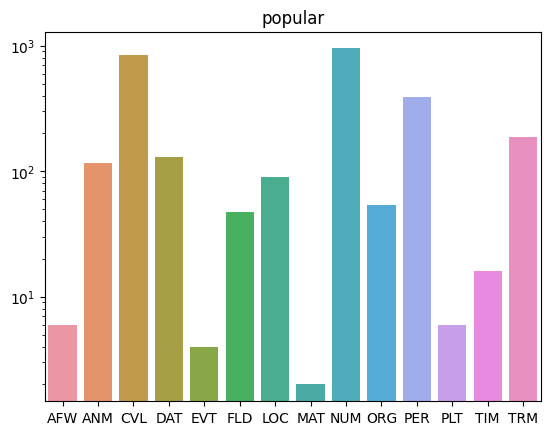

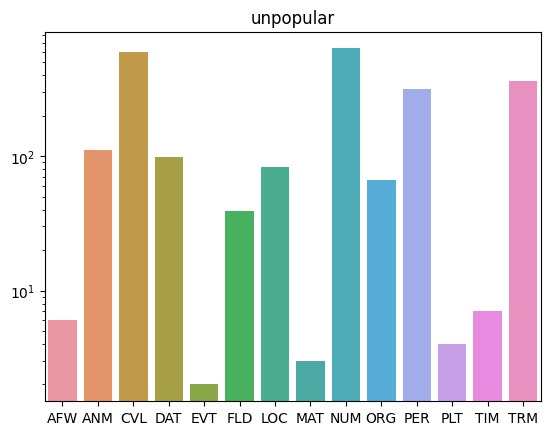

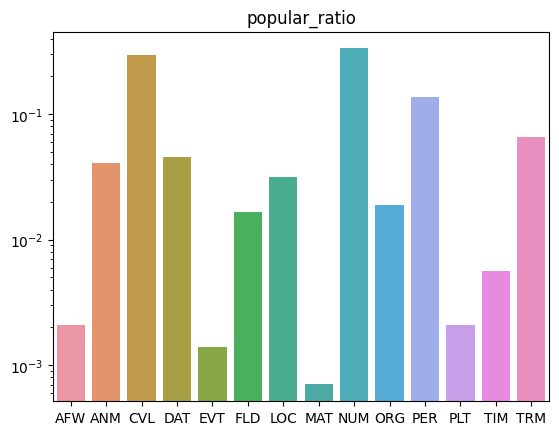

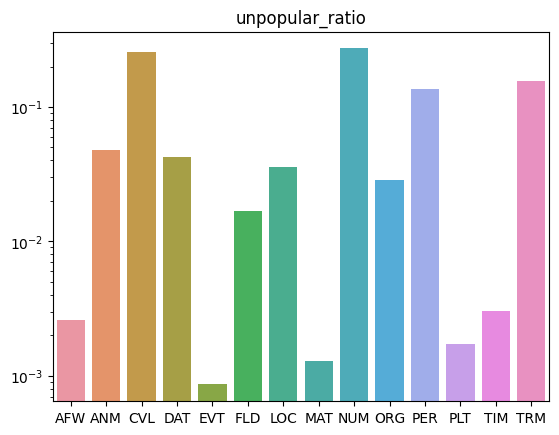

In [451]:
sns.barplot(x = list(pop_all_label.keys()), y = list(pop_all_label.values()))
plt.yscale('log')
plt.title('popular')
plt.show()
sns.barplot(x = list(unpop_all_label.keys()), y = list(unpop_all_label.values()))
plt.title('unpopular')
plt.yscale('log')
plt.show()
sns.barplot(x = list(pop_ratio_data.keys()), y = list(pop_ratio_data.values()))
plt.title('popular_ratio')
plt.yscale('log')
plt.show()
sns.barplot(x = list(unpop_ratio_data.keys()), y = list(unpop_ratio_data.values()))
plt.title('unpopular_ratio')
plt.yscale('log')
plt.show()

In [ ]:
# 키워드별 도출 비율 의미?(log스케일링)
# TRM에서만 차이가 나는 이유? 
# 카이제곱검정
# 검정자동화로 조합간 차이 증명 등.

In [ ]:
오늘 한 일

공통

DE

S3 제작

크롤링 코드 연결

ECR 제작

docker & CLI setting 진행

DA

토픽 모델링 & 유사도 분석 → 재분석(NER을 활용)

전이학습한 모델로 script 라벨링, 분류 결과 분석

그래프에서 인기 / 비인기 간 차이 보이지 않음

질문

유사도 분석 모듈화 진행 중. 계속 진행.

다음 할 일

공통

DE

S3 제작

크롤링 코드 연결

크롤링 & 전처리 Dockerfile 구성

ECR 제작

docker & CLI setting 

DA

NER

NER 라벨링 결과를 통한 다른 관점의 분석

특정 태그들이 자주 등장하는 이유

시각화 시 그나마 차이나는 태그에서 차이가 나는 것이 의미 있을지?

인기 / 비인기 강좌 간 차이가 없음을 증명할 근거

카이제곱 검정? 

질문

DE

DA